In [493]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [494]:
%matplotlib inline

In [495]:
pd.set_option('display.max_columns', None)  # при вызове .head будет показывать все колонки

In [496]:
data = pd.read_csv('train.csv')

### Знакомство с данными

In [497]:
data.shape  # size of dataframe

(15129, 21)

In [498]:
data.info()  # info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15129 entries, 0 to 15128
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15129 non-null  int64  
 1   date           15129 non-null  object 
 2   price          13763 non-null  float64
 3   bedrooms       13615 non-null  float64
 4   bathrooms      13616 non-null  float64
 5   sqft_living    13618 non-null  float64
 6   sqft_lot       13618 non-null  float64
 7   floors         14683 non-null  float64
 8   waterfront     14677 non-null  float64
 9   view           14695 non-null  float64
 10  condition      14656 non-null  float64
 11  grade          14666 non-null  float64
 12  sqft_above     13569 non-null  float64
 13  sqft_basement  14662 non-null  float64
 14  yr_built       14679 non-null  float64
 15  yr_renovated   14677 non-null  float64
 16  zipcode        14692 non-null  float64
 17  lat            14682 non-null  float64
 18  long  

Познакомимся с колонками в данных

    date: Date house was sold (Дата продажи участка)
    price: Price of the sold house (Цена продажи)
    bedrooms: Number of Bedrooms (Число спален)
    bathrooms: Number of bathrooms (Число ванных комнат)
    sqft_living: Square footage of the living space (жилая площадь)
    sqrt_lot: Square footage of the lot (общая площадь)
    floors: Total floors in the house (кол-во этажей в доме)
    waterfront: Whether the house is on a waterfront(1: yes, 0: no) (дом на набережной?)
    view: special view? (вид из окна)
    condition: Condition of the house (Состояние здания)
    grade: unknown 
    sqft_above: Square footage of house apart from basement (Площадь здания без подвала)
    sqft_basement: Square footage of the basement (Площадь подвала)
    yr_built: Built year (Год постройки)
    yr_renovated: Year when the house was renovated (Год реновации)
    zipcode: zipcode of the house (Индекс здания)
    lat: Latitude coordinate (Широта)
    long Longitude coordinate (Долгота)
    sqft_living15: Living room area in 2015(implies some renovations) (после реновации)
    sqrt_lot15: Lot area in 2015(implies some renovations) (после реновации)

In [499]:
data.head()  # first look

id             date  price  bedrooms  bathrooms  sqft_living  \
0  5561000190  20140502T000000    NaN       NaN        NaN          NaN   
1  2207200675  20140502T000000    NaN       NaN        NaN          NaN   
2  3390600010  20140502T000000    NaN       NaN        NaN          NaN   
3  7525000080  20140502T000000    NaN       NaN        NaN          NaN   
4  5072200040  20140502T000000    NaN       NaN        NaN          NaN   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0       NaN     2.0         0.0   0.0        4.0    9.0         NaN   
1       NaN     1.0         0.0   0.0        4.0    7.0         NaN   
2       NaN     1.0         0.0   0.0        4.0    7.0         NaN   
3       NaN     1.0         0.0   0.0        3.0    8.0         NaN   
4       NaN     1.0         0.0   2.0        5.0    8.0         NaN   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0            0.0    1977.0           0.0  98027.0  47.4635 -121.991   
1            0.0    1956.0           0.0  98007.0  47.6022 -122.134   
2            0.0    1955.0           0.0  98106.0  47.5334 -122.365   
3          360.0    1980.0           0.0  98074.0  47.6267 -122.046   
4          310.0    1957.0           0.0  98166.0  47.4419 -122.340   

   sqft_living15  sqft_lot15  
0            NaN         NaN  
1            NaN         NaN  
2            NaN         NaN  
3            NaN         NaN  
4            NaN         NaN

In [500]:
data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

Приведем даты к соответствующему виду

In [501]:
data['date'] = pd.to_datetime(data['date'])

Разберемся с пропусками в начале

In [502]:
out = data.isna()['price'].cumsum()  

In [503]:
out[out == (out.index + 1)].tail(1) # если кумулятивная сумма будет равна индексу значит под ряд пропускиz

1011    1012
Name: price, dtype: int32

У нас первые 1011 строк пропущены можем предположить, что они не записывались (спрашиваем у бизнеса)

In [504]:
data = data.iloc[1012:]

In [505]:
data

id       date     price  bedrooms  bathrooms  sqft_living  \
1012   6378500230 2014-05-20  423000.0      40.0       1.75       1940.0   
1013   5104520150 2014-05-20  426000.0       4.0       2.50       2800.0   
1014   7702010030 2014-05-20  551000.0       3.0       2.50       2830.0   
1015   7247000035 2014-05-20  210000.0       4.0       1.75       2180.0   
1016   8562790760 2014-05-20  785000.0       NaN       3.50       3070.0   
...           ...        ...       ...       ...        ...          ...   
15124  9528104286 2015-01-13  455000.0       2.0       1.50      10200.0   
15125  8682261440 2015-01-13       NaN       2.0       1.75      15600.0   
15126  2767700022 2015-01-13  500000.0       3.0       3.25       1520.0   
15127  1939050110 2015-01-13  500000.0       3.0       2.25       1440.0   
15128  1352300520 2015-01-13  294000.0       3.0       3.00       1670.0   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
1012     6909.0     1.0         0.0   0.0        4.0    7.0       970.0   
1013     8494.0     2.0         0.0   0.0        3.0    8.0      2800.0   
1014     5802.0     2.0         0.0   0.0        3.0    9.0     28300.0   
1015    28710.0     1.0         0.0   0.0        3.0    8.0      1180.0   
1016     4684.0     2.0         0.0   0.0        3.0   10.0         NaN   
...         ...     ...         ...   ...        ...    ...         ...   
15124    1146.0     3.0         0.0   0.0        3.0    7.0      1020.0   
15125    4500.0     1.0         0.0   0.0        3.0    8.0      1560.0   
15126    1500.0     3.0         0.0   0.0        3.0    7.0      1520.0   
15127   15661.0     1.0         0.0   0.0        3.0    8.0      1180.0   
15128    4120.0     1.5         0.0   0.0        3.0    7.0      1140.0   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
1012           970.0    1941.0           0.0  98133.0  47.7108 -122.352   
1013             0.0    2004.0           0.0  98038.0  47.3521 -122.009   
1014             0.0    2001.0           0.0  98028.0  47.7605 -122.234   
1015          1000.0    1950.0           0.0  98198.0  47.4050 -122.288   
1016           880.0    2009.0           0.0  98027.0  47.5316 -122.076   
...              ...       ...           ...      ...      ...      ...   
15124            0.0    2001.0           0.0  98115.0  47.6774 -122.325   
15125            0.0    2004.0           0.0  98053.0  47.7128 -122.032   
15126            0.0    2000.0           0.0  98107.0  47.6700 -122.389   
15127          260.0    1988.0           0.0  98074.0  47.6225 -122.038   
15128          530.0    1929.0        2012.0  98055.0  47.4881 -122.199   

       sqft_living15  sqft_lot15  
1012          1460.0      6906.0  
1013             NaN      8494.0  
1014          2500.0      5788.0  
1015          2180.0     28710.0  
1016          2290.0      2664.0  
...              ...         ...  
15124         1138.0      1156.0  
15125         1860.0      4500.0  
15126         1520.0      1323.0  
15127         1440.0     13963.0  
15128         1010.0      4120.0  

[14117 rows x 21 columns]

### Снова посмотрим на данные но без пропусков в начале и с отформатированными датами

In [506]:
data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### Посмотрим на распределение цен

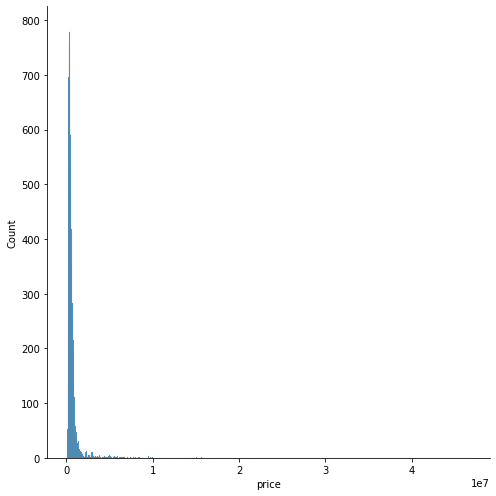

In [507]:
sns.displot(data, x='price', height=7)

In [508]:
data['price'] = np.log(data['price'])

C:\Users\HardWorkStation\AppData\Local\Temp\ipykernel_3456\4025759691.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



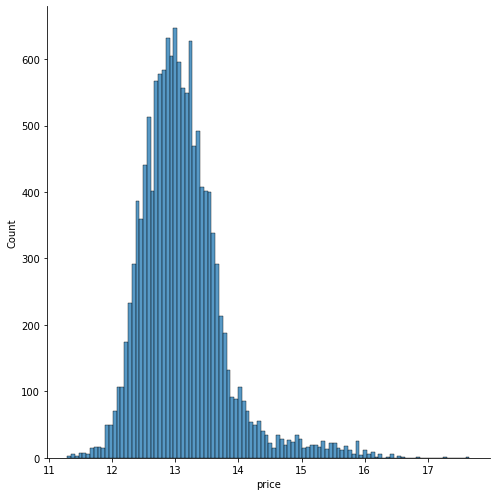

In [509]:
sns.displot(data, x='price', height=7)

<AxesSubplot:>

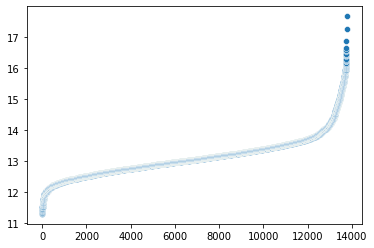

In [510]:
sns.scatterplot(x=range(len(data)), y=np.sort(data['price']))

Видим что данные распределены +- логнормально

In [511]:
data['price'].describe()

count    13763.000000
mean        13.113066
std          0.657628
min         11.289782
25%         12.691580
50%         13.031344
75%         13.415033
max         17.658826
Name: price, dtype: float64

### Рассмотрим распределение численных признаков

In [512]:
CONTINUES_COLS = [
    "price",
    "sqft_living",
    "sqft_lot",
    "sqft_above",
    "sqft_living15",
    "sqft_lot15"
]

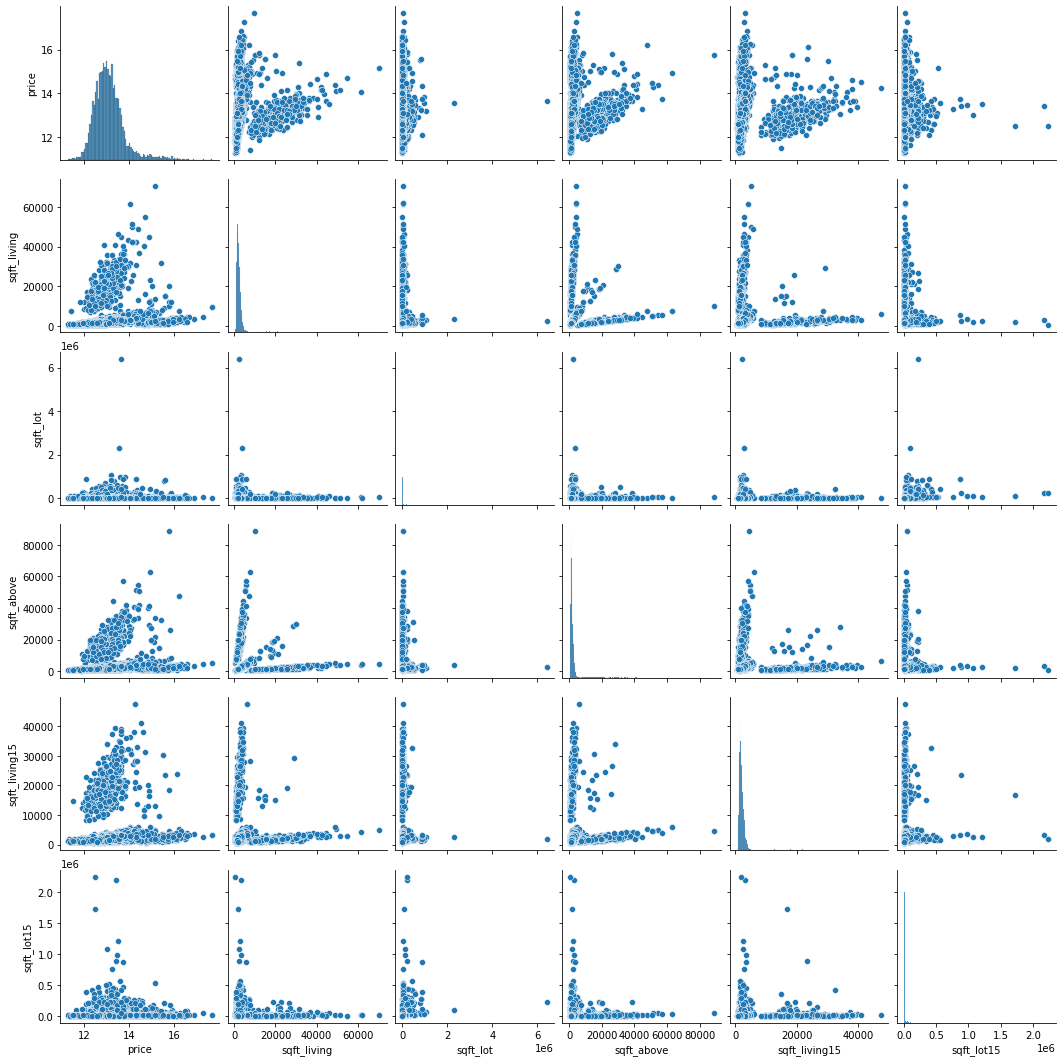

In [513]:
sns.pairplot(data[CONTINUES_COLS])

Кто видит странности? 

### Рассмотрим очевидную зависимость жилой площади и стоимости

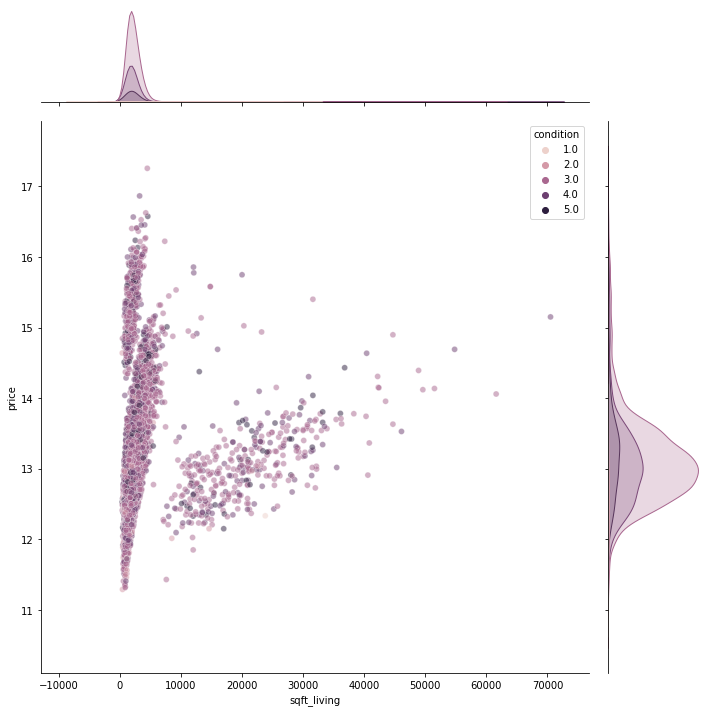

In [514]:
sns.jointplot(data=data, x='sqft_living', y='price', hue='condition', alpha = 0.5, height=10)

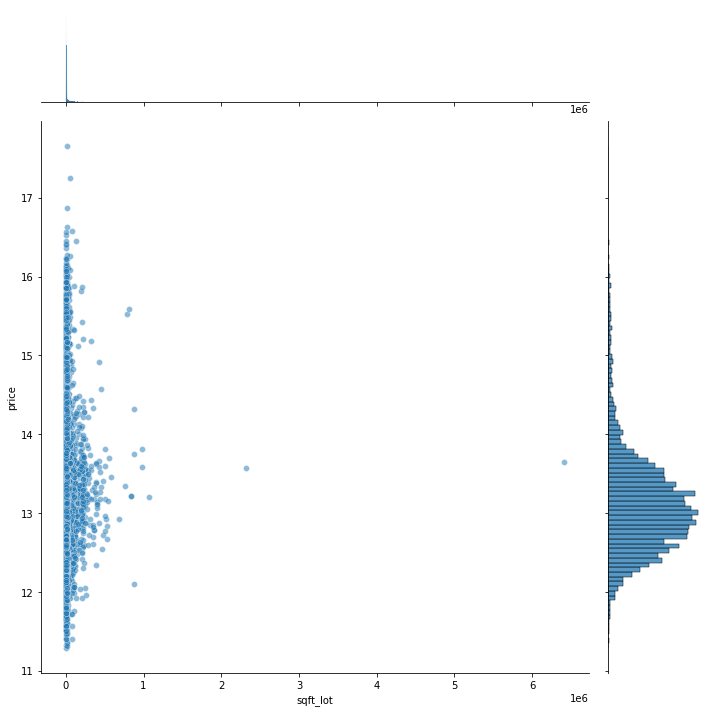

In [515]:
sns.jointplot(data=data, x='sqft_lot', y='price', alpha = 0.5, height=10)

Можем увидеть несколько кластеров для которых свойственен свой наклон линейной зависимости

### Посмотрим на распределения внутри категорий

Condition

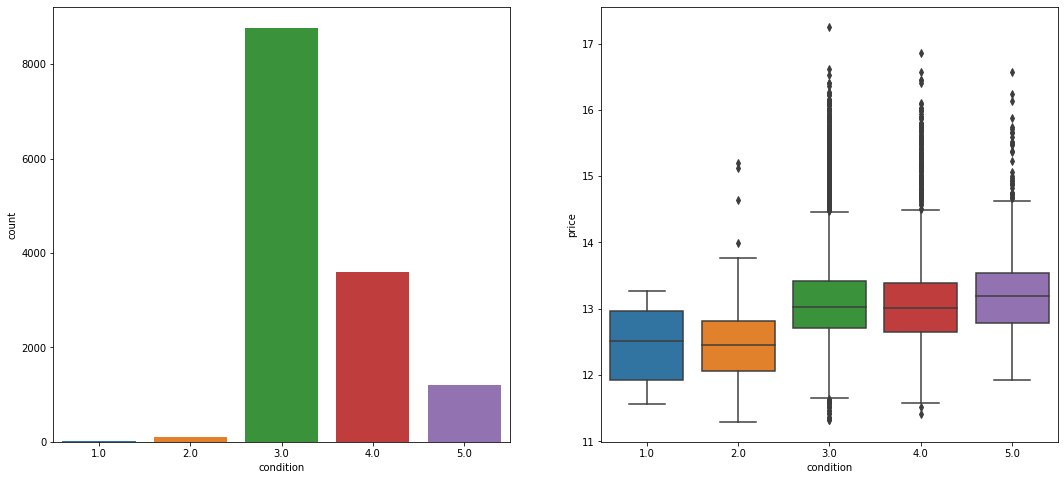

In [516]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
sns.countplot(x='condition', data=data, ax=ax[0])
sns.boxplot(x='condition', y= 'price',
            data=data, ax=ax[1])
plt.show()

<Figure size 864x576 with 0 Axes>

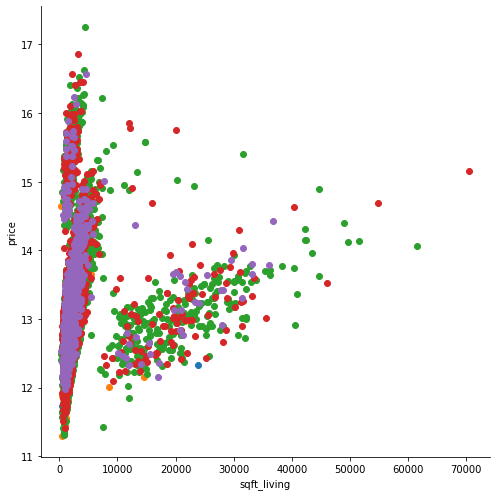

In [517]:
plt.figure(figsize = (12,8))
g = sns.FacetGrid(data=data, hue='condition', height=7)
g.map(plt.scatter, "sqft_living", "price")
plt.show()

Bedrooms

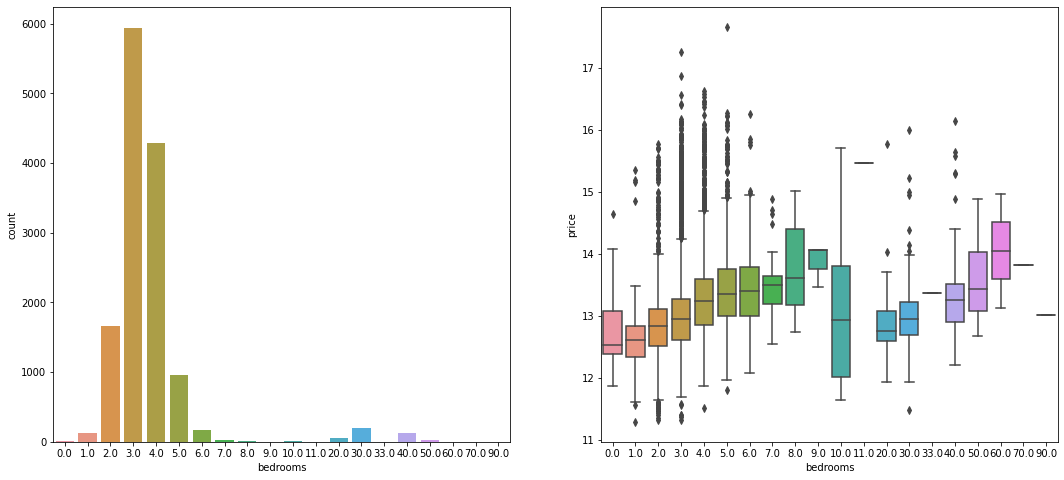

In [518]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
sns.countplot(x='bedrooms', data=data, ax=ax[0])
sns.boxplot(x='bedrooms', y= 'price',
            data=data, ax=ax[1])
plt.show()

In [519]:
data

id       date      price  bedrooms  bathrooms  sqft_living  \
1012   6378500230 2014-05-20  12.955127      40.0       1.75       1940.0   
1013   5104520150 2014-05-20  12.962195       4.0       2.50       2800.0   
1014   7702010030 2014-05-20  13.219490       3.0       2.50       2830.0   
1015   7247000035 2014-05-20  12.254863       4.0       1.75       2180.0   
1016   8562790760 2014-05-20  13.573439       NaN       3.50       3070.0   
...           ...        ...        ...       ...        ...          ...   
15124  9528104286 2015-01-13  13.028053       2.0       1.50      10200.0   
15125  8682261440 2015-01-13        NaN       2.0       1.75      15600.0   
15126  2767700022 2015-01-13  13.122363       3.0       3.25       1520.0   
15127  1939050110 2015-01-13  13.122363       3.0       2.25       1440.0   
15128  1352300520 2015-01-13  12.591335       3.0       3.00       1670.0   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
1012     6909.0     1.0         0.0   0.0        4.0    7.0       970.0   
1013     8494.0     2.0         0.0   0.0        3.0    8.0      2800.0   
1014     5802.0     2.0         0.0   0.0        3.0    9.0     28300.0   
1015    28710.0     1.0         0.0   0.0        3.0    8.0      1180.0   
1016     4684.0     2.0         0.0   0.0        3.0   10.0         NaN   
...         ...     ...         ...   ...        ...    ...         ...   
15124    1146.0     3.0         0.0   0.0        3.0    7.0      1020.0   
15125    4500.0     1.0         0.0   0.0        3.0    8.0      1560.0   
15126    1500.0     3.0         0.0   0.0        3.0    7.0      1520.0   
15127   15661.0     1.0         0.0   0.0        3.0    8.0      1180.0   
15128    4120.0     1.5         0.0   0.0        3.0    7.0      1140.0   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
1012           970.0    1941.0           0.0  98133.0  47.7108 -122.352   
1013             0.0    2004.0           0.0  98038.0  47.3521 -122.009   
1014             0.0    2001.0           0.0  98028.0  47.7605 -122.234   
1015          1000.0    1950.0           0.0  98198.0  47.4050 -122.288   
1016           880.0    2009.0           0.0  98027.0  47.5316 -122.076   
...              ...       ...           ...      ...      ...      ...   
15124            0.0    2001.0           0.0  98115.0  47.6774 -122.325   
15125            0.0    2004.0           0.0  98053.0  47.7128 -122.032   
15126            0.0    2000.0           0.0  98107.0  47.6700 -122.389   
15127          260.0    1988.0           0.0  98074.0  47.6225 -122.038   
15128          530.0    1929.0        2012.0  98055.0  47.4881 -122.199   

       sqft_living15  sqft_lot15  
1012          1460.0      6906.0  
1013             NaN      8494.0  
1014          2500.0      5788.0  
1015          2180.0     28710.0  
1016          2290.0      2664.0  
...              ...         ...  
15124         1138.0      1156.0  
15125         1860.0      4500.0  
15126         1520.0      1323.0  
15127         1440.0     13963.0  
15128         1010.0      4120.0  

[14117 rows x 21 columns]

In [520]:
data.loc[data['bedrooms'] == 0] = 1

C:\Users\HardWorkStation\AppData\Local\Temp\ipykernel_3456\1694608259.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [521]:
data['sqft_per_bedroom'] = (data['sqft_living'] / data['bedrooms'].fillna(1))

C:\Users\HardWorkStation\AppData\Local\Temp\ipykernel_3456\2049653802.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:>

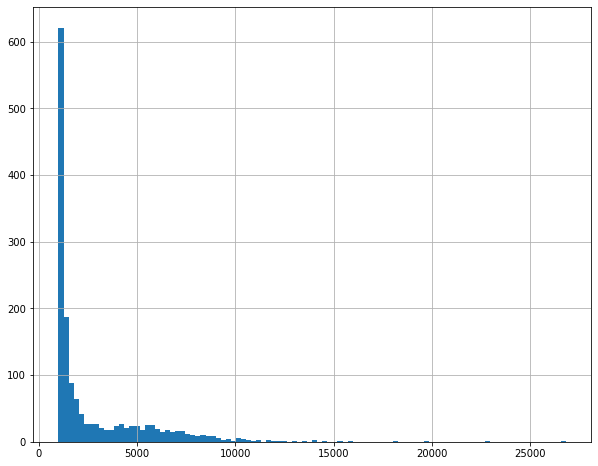

In [522]:
plt.figure(figsize=(10, 8))
data[data['sqft_per_bedroom'] > 1000]['sqft_per_bedroom'].hist(bins=100)

<AxesSubplot:>

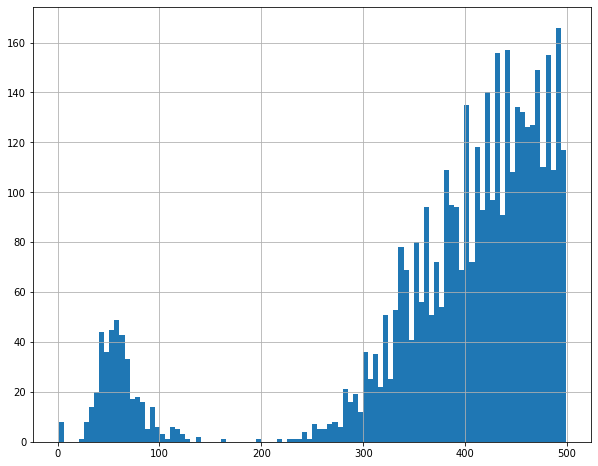

In [523]:
plt.figure(figsize=(10, 8))
data[data['sqft_per_bedroom'] < 500]['sqft_per_bedroom'].hist(bins=100)

In [524]:
(data['sqft_per_bedroom'] < 200).sum()

399

In [525]:
data = data[data['sqft_per_bedroom'] > 200]

In [526]:
data = data[data['bedrooms'] < 9]

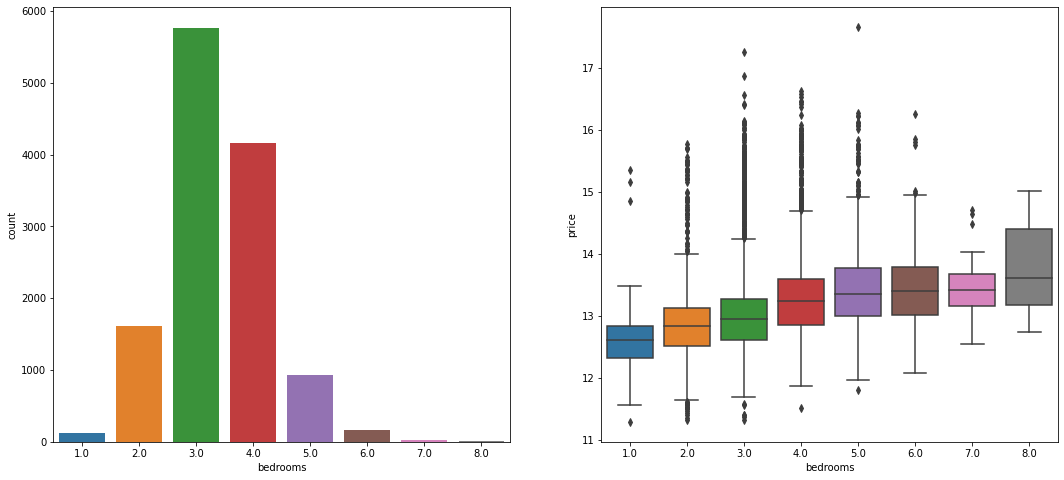

In [527]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
sns.countplot(x='bedrooms', data=data, ax=ax[0])
sns.boxplot(x='bedrooms', y= 'price',
            data=data, ax=ax[1])
plt.show()

<Figure size 864x576 with 0 Axes>

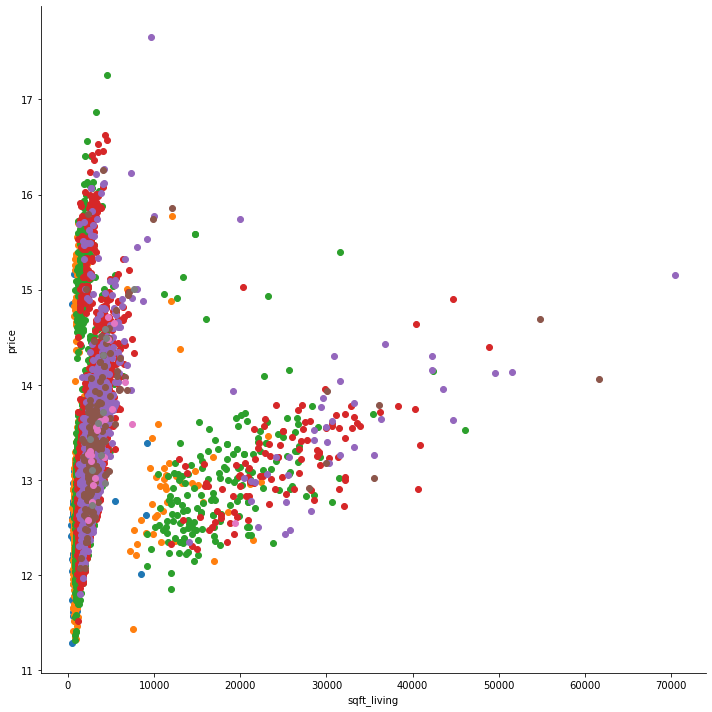

In [528]:
plt.figure(figsize = (12,8))
g = sns.FacetGrid(data=data, hue='bedrooms', height=10)
g.map(plt.scatter, "sqft_living", "price")
plt.show()

View

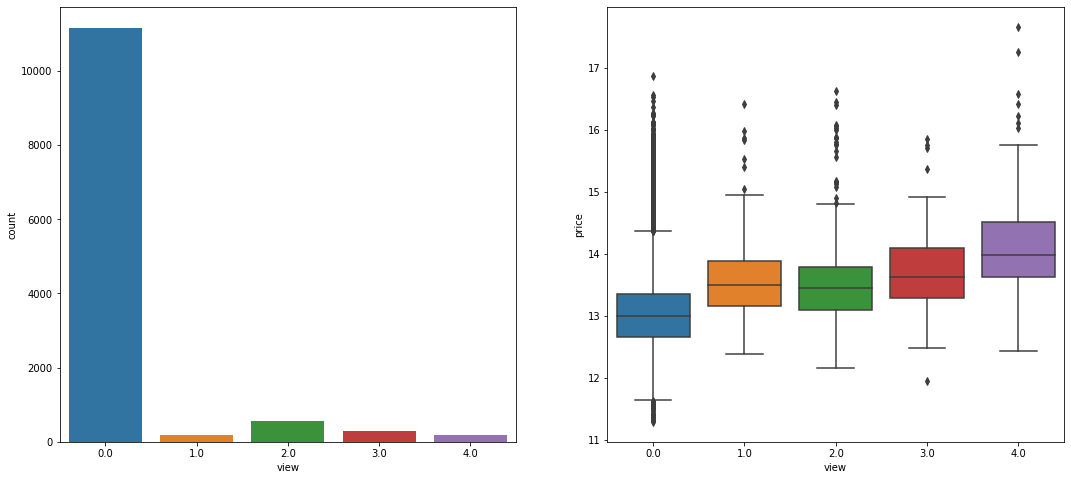

In [529]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
sns.countplot(x='view', data=data, ax=ax[0])
sns.boxplot(x='view', y= 'price',
            data=data, ax=ax[1])
plt.show()

<Figure size 864x576 with 0 Axes>

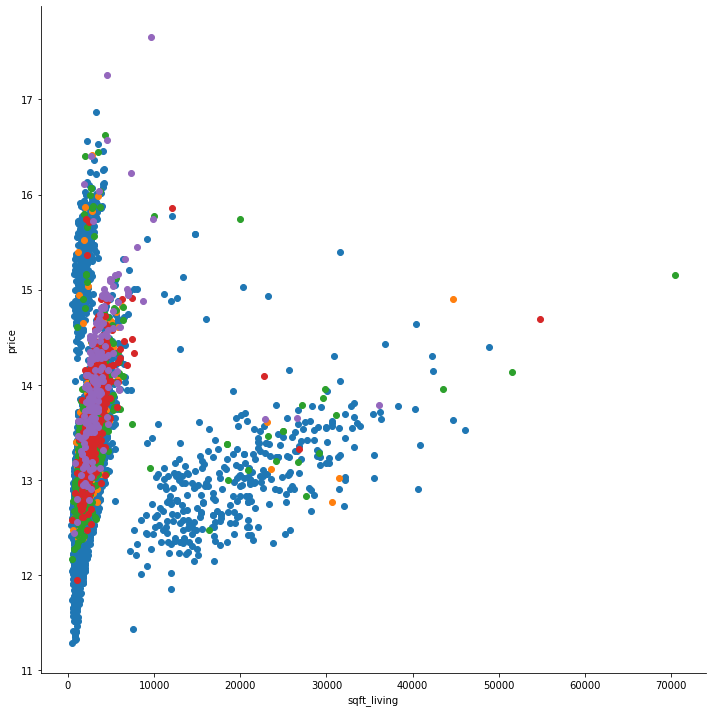

In [530]:
plt.figure(figsize = (12,8))
g = sns.FacetGrid(data=data, hue='view', height=10)
g.map(plt.scatter, "sqft_living", "price")
plt.show()

Bathrooms

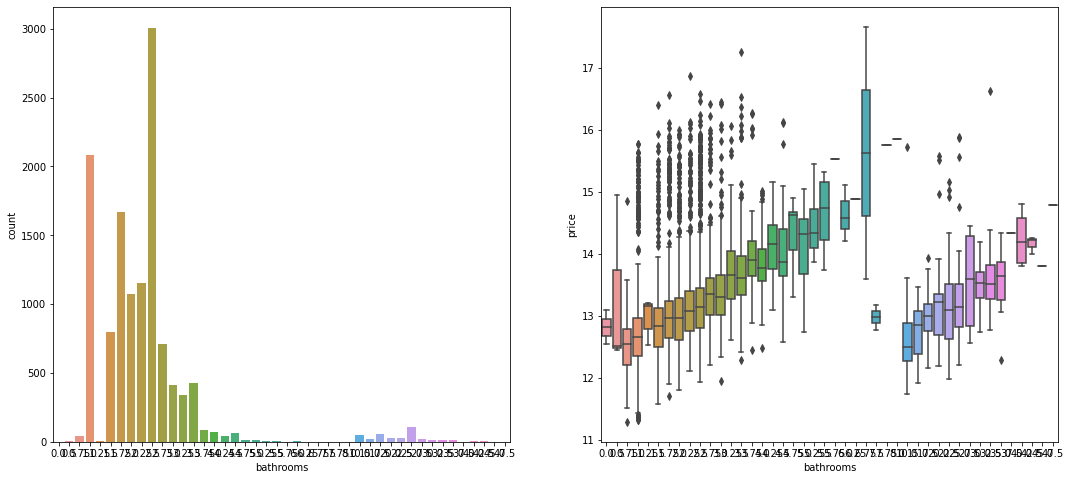

In [531]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
sns.countplot(x='bathrooms', data=data, ax=ax[0])
sns.boxplot(x='bathrooms', y= 'price',
            data=data, ax=ax[1])
plt.show()

<Figure size 864x576 with 0 Axes>

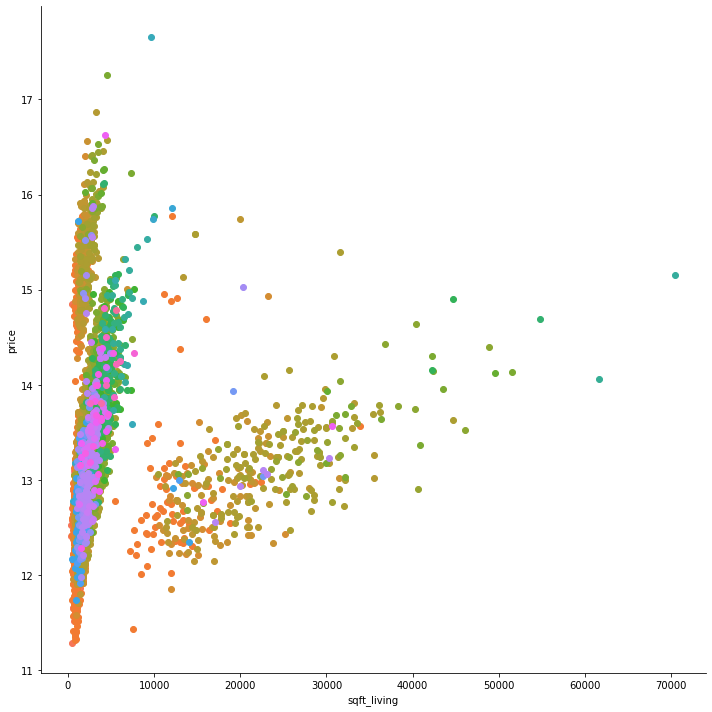

In [532]:
plt.figure(figsize = (12,8))
g = sns.FacetGrid(data=data, hue='bathrooms', height=10)
g.map(plt.scatter, "sqft_living", "price")
plt.show()

In [533]:
data.loc[data['bathrooms'] == 0, 'bathrooms'] = 1

In [534]:
(data['bathrooms'] == 0).sum()

0

In [535]:
data['sqft_per_bedroom'] = (data['sqft_living'] / data['bathrooms'].fillna(1))

<AxesSubplot:>

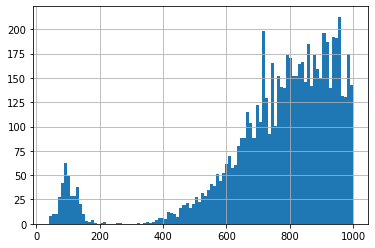

In [536]:
data[data['sqft_per_bedroom'] < 1000]['sqft_per_bedroom'].hist(bins=100)

In [537]:
data = data[data['sqft_per_bedroom'] > 300]

<AxesSubplot:>

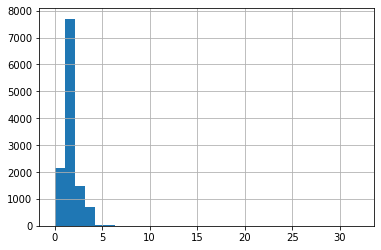

In [538]:
data['bathrooms'].round().hist(bins=30)

In [539]:
len(data[data['bathrooms'] > 7])

15

In [540]:
data = data[data['bathrooms'] < 7]

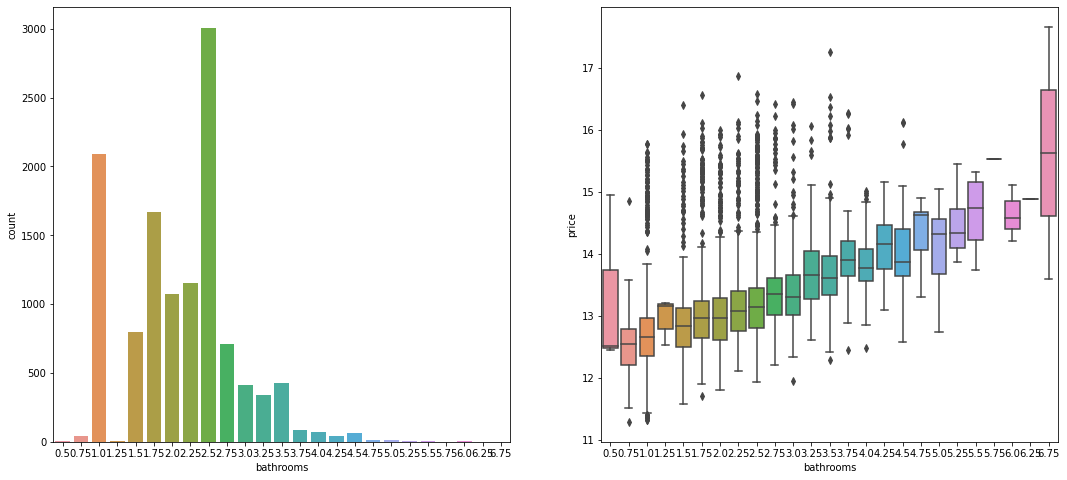

In [541]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
sns.countplot(x='bathrooms', data=data, ax=ax[0])
sns.boxplot(x='bathrooms', y= 'price',
            data=data, ax=ax[1])
plt.show()

<Figure size 864x576 with 0 Axes>

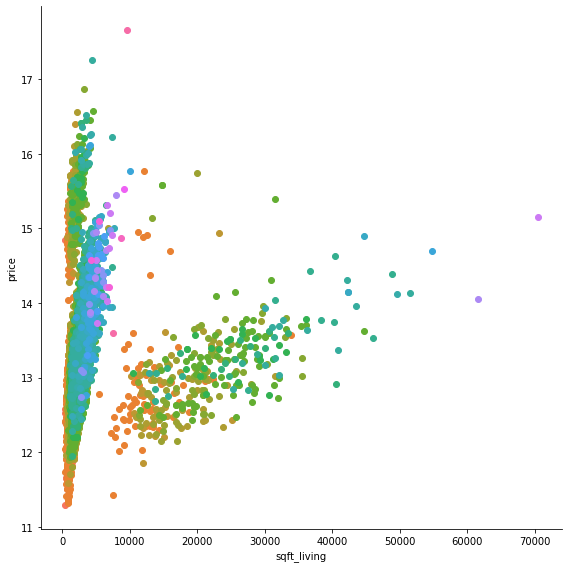

In [542]:
plt.figure(figsize = (12,8))
g = sns.FacetGrid(data=data, hue='bathrooms', height=8)
g.map(plt.scatter, "sqft_living", "price")
plt.show()

Floor

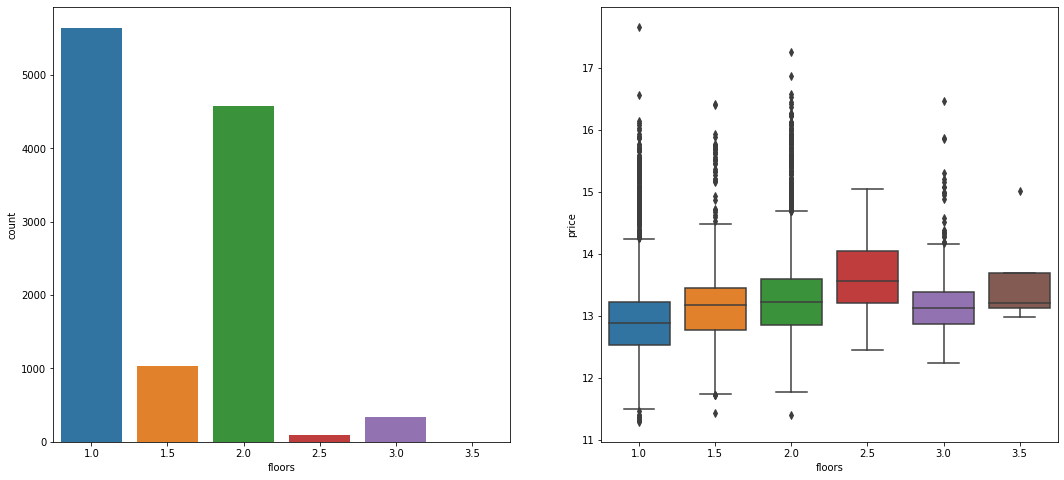

In [543]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
sns.countplot(x='floors', data=data, ax=ax[0])
sns.boxplot(x='floors', y= 'price',
            data=data, ax=ax[1])
plt.show()

<Figure size 864x576 with 0 Axes>

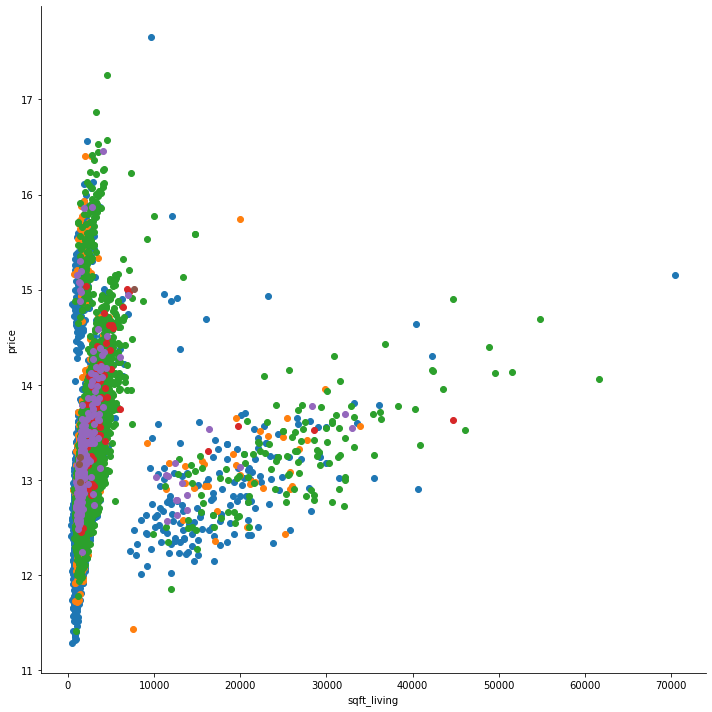

In [544]:
plt.figure(figsize = (12,8))
g = sns.FacetGrid(data=data, hue='floors', height=10)
g.map(plt.scatter, "sqft_living", "price")
plt.show()

Grade

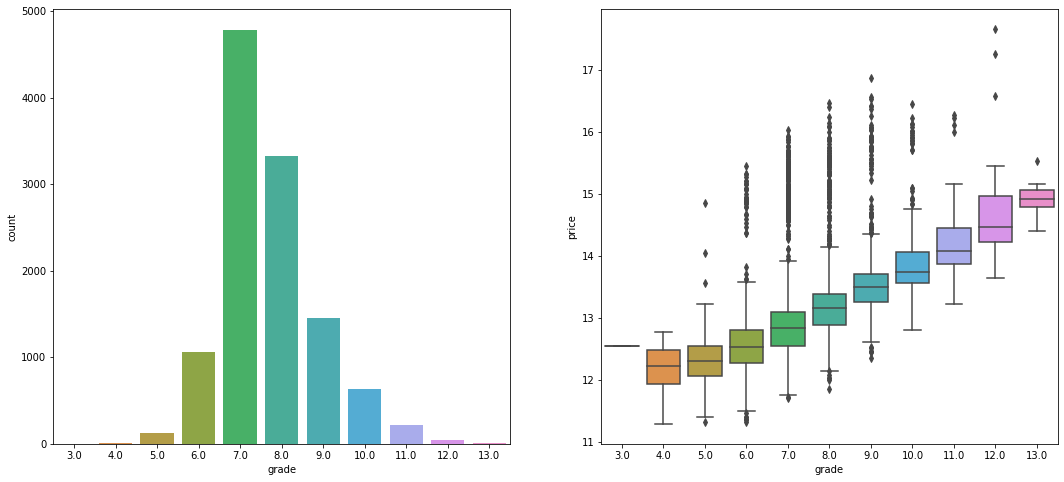

In [545]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))
sns.countplot(x='grade', data=data, ax=ax[0])
sns.boxplot(x='grade', y= 'price',
            data=data, ax=ax[1])
plt.show()

<Figure size 864x576 with 0 Axes>

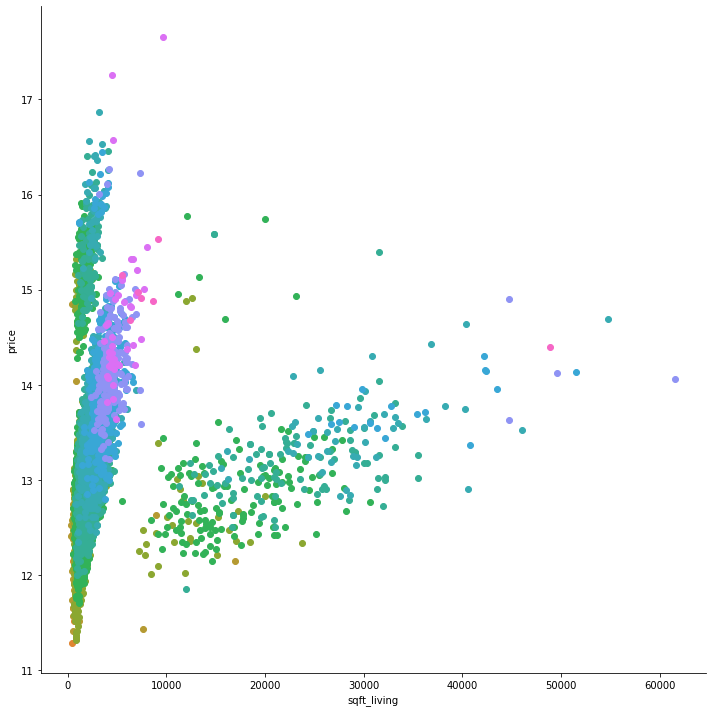

In [546]:
plt.figure(figsize = (12,8))
g = sns.FacetGrid(data=data, hue='grade', height=10)
g.map(plt.scatter, "sqft_living", "price")
plt.show()

In [547]:
data['sqft_living'] = np.log(data['sqft_living'])

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

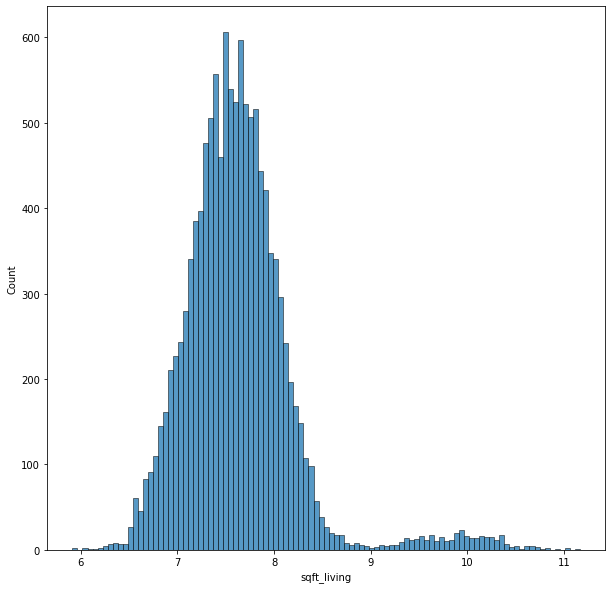

In [548]:
plt.figure(figsize=(10, 10))
sns.histplot(data, x='sqft_living',)

In [549]:
len(data[data['sqft_living'] > 9])

359

In [550]:
data = data[data['sqft_living'] < 9]

<Figure size 864x576 with 0 Axes>

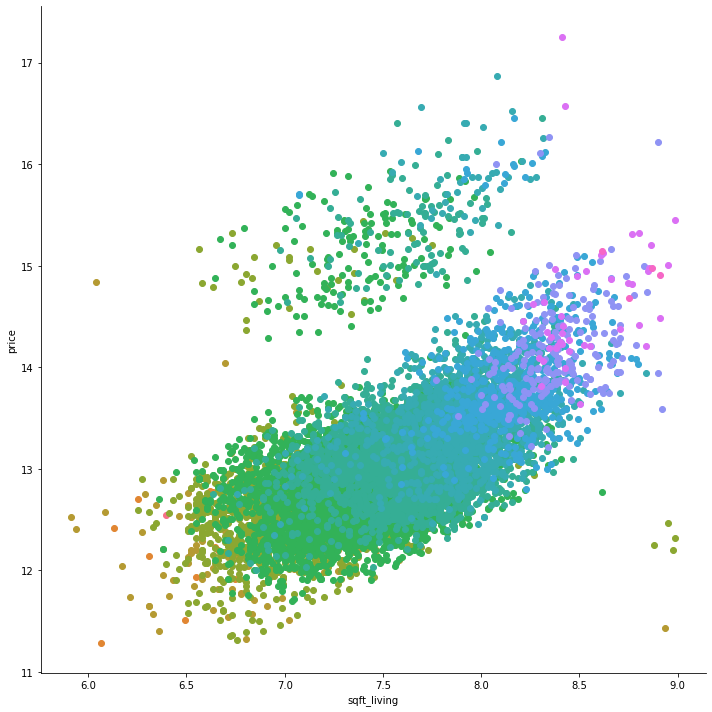

In [551]:
plt.figure(figsize = (12,8))
g = sns.FacetGrid(data=data, hue='grade', height=10)
g.map(plt.scatter, "sqft_living", "price")
plt.show()

<AxesSubplot:xlabel='price', ylabel='Count'>

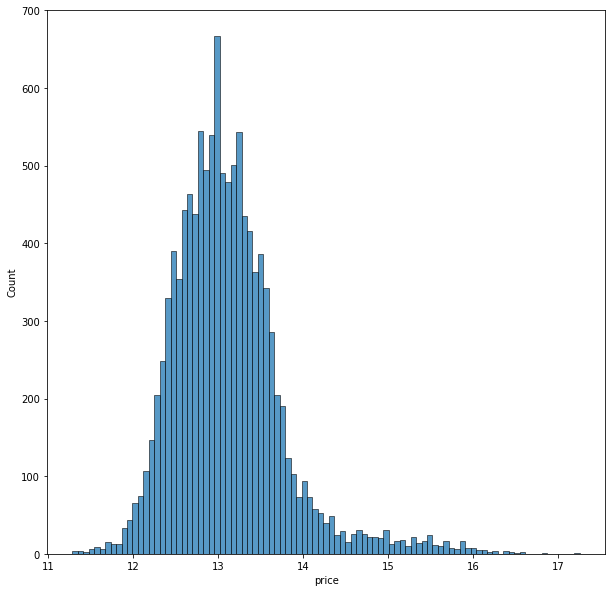

In [552]:
plt.figure(figsize=(10, 10))
sns.histplot(data, x='price',)

### Корреляции в категориях

In [553]:
bath = ['bathrooms', 'bedrooms']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(data[bath[0]], data[bath[1]]).style.background_gradient(cmap = cm)

In [554]:
bath_cond = ['bathrooms', 'condition']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(data[bath_cond[0]], data[bath_cond[1]]).style.background_gradient(cmap = cm)

In [555]:
bed_cond = ['bedrooms', 'condition']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(data[bed_cond[0]], data[bed_cond[1]]).style.background_gradient(cmap = cm)

In [556]:
cond_water = ['condition', 'waterfront']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(data[cond_water[0]], data[cond_water[1]]).style.background_gradient(cmap = cm)

In [557]:
grade_cond = ['grade', 'condition']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(data[grade_cond[0]], data[grade_cond[1]]).style.background_gradient(cmap = cm)

In [558]:
grade_bed = ['grade', 'bedrooms']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(data[grade_bed[0]], data[grade_bed[1]]).style.background_gradient(cmap = cm)

In [559]:
grade_bath = ['grade', 'bathrooms']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(data[grade_bath[0]], data[grade_bath[1]]).style.background_gradient(cmap = cm)

### Корреляция в вещественных

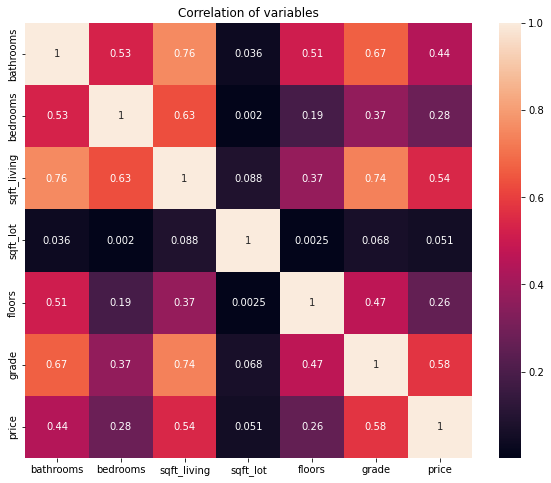

In [560]:
corr = data[['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'price']]

plt.figure(figsize=(10,8))
plt.title('Correlation of variables')
sns.heatmap(corr.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

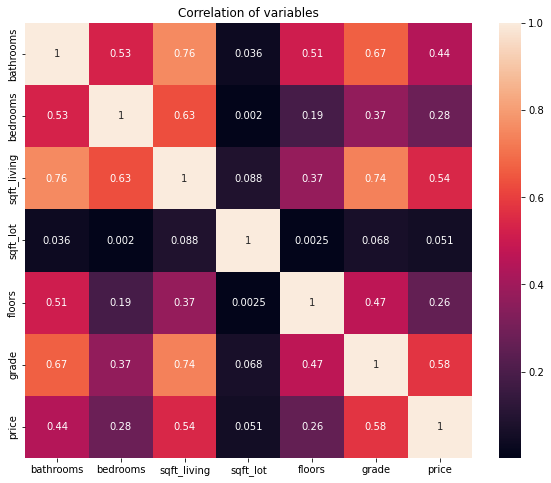

In [561]:
corr = data[['bathrooms', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'price']]

plt.figure(figsize=(10,8))
plt.title('Correlation of variables')
sns.heatmap(corr.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

### Посмотрим на зависимости года постройки и цены

g:\practicum_ds\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='yr_built', ylabel='Density'>

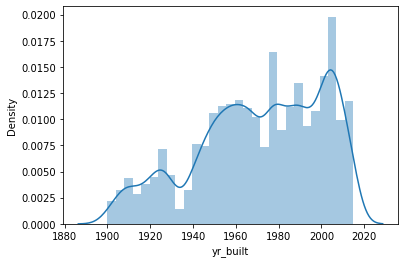

In [562]:
sns.distplot(data['yr_built'])

g:\practicum_ds\venv\lib\site-packages\seaborn\categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

g:\practicum_ds\venv\lib\site-packages\seaborn\categorical.py:3723: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



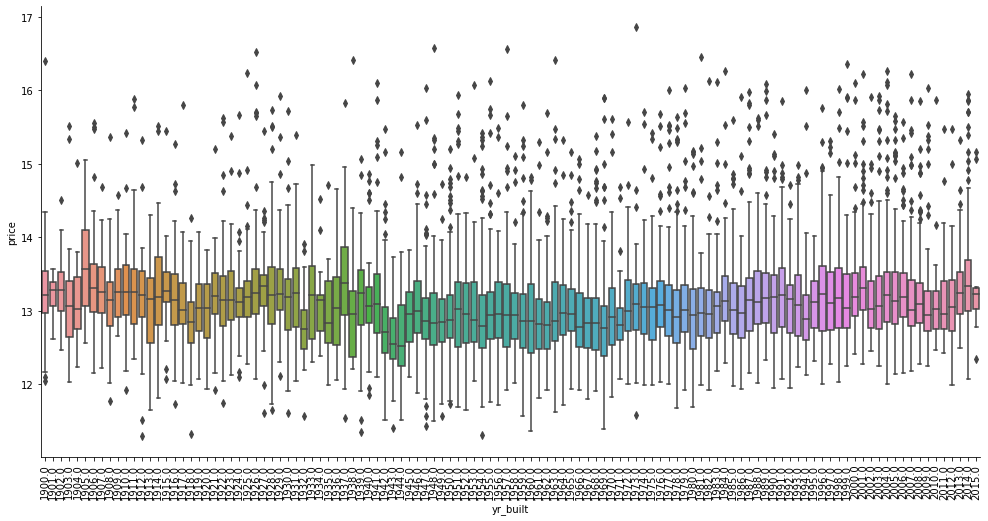

In [563]:
g = sns.factorplot(x="yr_built", y = "price", data=data[data['price'] < 1000000], 
                   size= 7, aspect = 2, kind="box" )
g.set_xticklabels(rotation=90)
plt.show()

In [564]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11679 entries, 1013 to 15128
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                11679 non-null  int64  
 1   date              11679 non-null  object 
 2   price             11448 non-null  float64
 3   bedrooms          11679 non-null  float64
 4   bathrooms         11679 non-null  float64
 5   sqft_living       11679 non-null  float64
 6   sqft_lot          11321 non-null  float64
 7   floors            11333 non-null  float64
 8   waterfront        11326 non-null  float64
 9   view              11327 non-null  float64
 10  condition         11320 non-null  float64
 11  grade             11326 non-null  float64
 12  sqft_above        11299 non-null  float64
 13  sqft_basement     11324 non-null  float64
 14  yr_built          11325 non-null  float64
 15  yr_renovated      11337 non-null  float64
 16  zipcode           11339 non-null  flo

### Д/З

Необходимо:
    
    1) Рассмотреть как выглядят данные до и после удаления выбросов, проанализировать как могут выбросы влиять на данные и совместные распределения
    2) В данных еще есть выбросы нужно их найти и избавиться от них (либо попробовать использовать)
    3) Придумать новые признаки (возраст здания и т.п. для дальнейшего обучения модели)
    4) Создать эти признаки для тестовой выборки на основе трейновой
    5) Обучить на этих данных модель сравнить с качеством бейзлайна
    6) Подобрать параметры и оценить насколько удалось улучшить качество за счет подбора параметров
    

#### Вспомним описание данных

date: Date house was sold (Дата продажи участка)
price: Price of the sold house (Цена продажи)
bedrooms: Number of Bedrooms (Число спален)
bathrooms: Number of bathrooms (Число ванных комнат)
sqft_living: Square footage of the living space (жилая площадь)
sqrt_lot: Square footage of the lot (общая площадь)
floors: Total floors in the house (кол-во этажей в доме)
waterfront: Whether the house is on a waterfront(1: yes, 0: no) (дом на набережной?)
view: special view? (вид из окна)
condition: Condition of the house (Состояние здания)
grade: unknown
sqft_above: Square footage of house apart from basement (Площадь здания без подвала)
sqft_basement: Square footage of the basement (Площадь подвала)
yr_built: Built year (Год постройки)
yr_renovated: Year when the house was renovated (Год реновации)
zipcode: zipcode of the house (Индекс здания)
lat: Latitude coordinate (Широта)
long Longitude coordinate (Долгота)
sqft_living15: Living room area in 2015(implies some renovations) (после реновации)
sqrt_lot15: Lot area in 2015(implies some renovations) (после реновации)

### Задание 1 и 2. Избавимся от выбросов и рассмотр как выглядят данные до и после удаления выбросов, проанализировать как могут выбросы влиять на данные и совместные распределения

Посмотрим какие у нас еще остались возможные выбросы и аномалии

In [565]:
# вспомним что за данные у нас вообще есть
data.head()

id                 date      price  bedrooms  bathrooms  \
1013  5104520150  2014-05-20 00:00:00  12.962195       4.0       2.50   
1014  7702010030  2014-05-20 00:00:00  13.219490       3.0       2.50   
1015  7247000035  2014-05-20 00:00:00  12.254863       4.0       1.75   
1018  6699000710  2014-05-20 00:00:00  12.574182       3.0       2.50   
1033  8024200685  2014-05-20 00:00:00  12.994530       3.0       1.50   

      sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
1013     7.937375    8494.0     2.0         0.0   0.0        3.0    8.0   
1014     7.948032    5802.0     2.0         0.0   0.0        3.0    9.0   
1015     7.687080   28710.0     1.0         0.0   0.0        3.0    8.0   
1018     7.644919    4700.0     2.0         0.0   0.0        3.0    8.0   
1033     7.146772    1443.0     3.0         0.0   0.0        3.0    8.0   

      sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
1013      2800.0            0.0    2004.0           0.0  98038.0  47.3521   
1014     28300.0            0.0    2001.0           0.0  98028.0  47.7605   
1015      1180.0         1000.0    1950.0           0.0  98198.0  47.4050   
1018      2090.0            0.0    2002.0           0.0  98042.0  47.3724   
1033      1270.0            0.0    2007.0           0.0  98115.0  47.6990   

         long  sqft_living15  sqft_lot15  sqft_per_bedroom  
1013 -122.009            NaN      8494.0       1120.000000  
1014 -122.234         2500.0      5788.0       1132.000000  
1015 -122.288         2180.0     28710.0       1245.714286  
1018 -122.104         2740.0      5040.0        836.000000  
1033 -122.317         1270.0      1413.0        846.666667

In [566]:
(data["sqft_basement"] / data["sqft_lot"])\
    .value_counts()\
    .reset_index()\
    .sort_values(by='index', ascending=False)\
    .rename({'index':'basement_area_increase', 0:'count'}, axis=1)\
    .query('basement_area_increase > 0.3')

basement_area_increase  count
339                 0.737179      1
2320                0.627208      1
1417                0.600000      1
871                 0.592075      1
761                 0.574468      1
...                      ...    ...
806                 0.303624      1
1097                0.303030      1
576                 0.302778      1
407                 0.302362      1
3448                0.301389      1

[117 rows x 2 columns]

Есть 117 объектов, где площадь подвала больше общей площади объекта более чем на 30%. А есть объекты, где даже более чем на 60%. Выбросы? Аномалии? Я бы уточнил у поставщика данных. А пока не будем считать это каким-то выбросом и удалять их не будем.


In [567]:
(data["sqft_lot15"] / data["sqft_lot"])\
    .value_counts()\
    .reset_index()\
    .sort_values(by='index', ascending=False)\
    .rename({'index':'lot_area_increase', 0:'count'}, axis=1)\
    .query('lot_area_increase > 2')

lot_area_increase  count
792           33.707865      1
1450          27.908352      1
7009          27.533765      1
7784          23.999302      1
6330          22.619747      1
...                 ...    ...
2570           2.018201      1
6923           2.007160      1
3962           2.003183      1
2558           2.002662      1
1312           2.001601      1

[447 rows x 2 columns]

Вот так реновация! В 447 случаях общая площадь увеличилась более чем в 2 раза, а где-то и почти в 34! Этот вопрос я бы также уточнил у поставщика. Пока не удаляем.

In [568]:
#sns.pairplot(data[CONTINUES_COLS], hue='price')

In [569]:
for col in CONTINUES_COLS:
    high_quantile = 0.95
    filtered_count = len(data[data[col] > data[col].quantile(high_quantile)])
    len_data = len(data)
    # отфильртуем все, что больше 0,95 квантиля
    print(f"В колонке {col} отфильтруем {filtered_count} значений, что составляет {filtered_count / len_data:.02f}% от датасета")
    data[col] = data[data[col] < data[col].quantile(high_quantile)][col]

В колонке price отфильтруем 573 значений, что составляет 0.05% от датасета
В колонке sqft_living отфильтруем 577 значений, что составляет 0.05% от датасета
В колонке sqft_lot отфильтруем 566 значений, что составляет 0.05% от датасета
В колонке sqft_above отфильтруем 564 значений, что составляет 0.05% от датасета
В колонке sqft_living15 отфильтруем 565 значений, что составляет 0.05% от датасета
В колонке sqft_lot15 отфильтруем 566 значений, что составляет 0.05% от датасета


In [570]:
#sns.pairplot(data[CONTINUES_COLS], hue='price')

### Выводы

После того как мы избавились от выбросов, наши данные приобрели "объем" при построении графиков совместных распределений и теперь можно более наглядно разглядеть или оценить зависимости.


### Задание 3. Придумать новые признаки (возраст здания и т.п. для дальнейшего обучения модели)

Сначала думал определить расстояния между объектами по формуле определения расстояния между объектами по координатам [отсюда](https://gis-lab.info/qa/great-circles.html#.D0.A0.D0.B5.D0.B0.D0.BB.D0.B8.D0.B7.D0.B0.D1.86.D0.B8.D1.8F_.D0.BD.D0.B0_.D1.8F.D0.B7.D1.8B.D0.BA.D0.B5_Python), но потом понял что мне это сейчас скорее всего не пригодится, но функцию оставил, вдруг пригодится в будущем. А может быть и не только мне :)

In [571]:
import math

def get_distance(llat1, llong1, llat2, llong2):
    #rad - радиус сферы (Земли)
    rad = 6372795

    # #координаты двух точек
    # llat1 = 77.1539
    # llong1 = -120.398
    #
    # llat2 = 77.1804
    # llong2 = 129.55

    #в радианах
    lat1 = llat1*math.pi/180.
    lat2 = llat2*math.pi/180.
    long1 = llong1*math.pi/180.
    long2 = llong2*math.pi/180.

    #косинусы и синусы широт и разницы долгот
    cl1 = math.cos(lat1)
    cl2 = math.cos(lat2)
    sl1 = math.sin(lat1)
    sl2 = math.sin(lat2)
    delta = long2 - long1
    cdelta = math.cos(delta)
    sdelta = math.sin(delta)

    #вычисления длины большого круга
    y = math.sqrt(math.pow(cl2*sdelta,2)+math.pow(cl1*sl2-sl1*cl2*cdelta,2))
    x = sl1*sl2+cl1*cl2*cdelta
    ad = math.atan2(y,x)
    dist = ad*rad

    #вычисление начального азимута
    # x = (cl1*sl2) - (sl1*cl2*cdelta)
    # y = sdelta*cl2
    # z = math.degrees(math.atan(-y/x))
    #
    # if x < 0:
    #     z = z+180.
    #
    # z2 = (z+180.) % 360. - 180.
    # z2 = - math.radians(z2)
    # anglerad2 = z2 - ((2*math.pi)*math.floor((z2/(2*math.pi))) )
    # angledeg = (anglerad2*180.)/math.pi

    # print('Distance >> %.0f' % dist, ' [meters]')
    # print('Initial bearing >> ', angledeg, '[degrees]')

    return dist

Для начала избавимся от пропусков

In [572]:
data.isna().sum()

id                    0
date                  0
price               804
bedrooms              0
bathrooms             0
sqft_living         586
sqft_lot            925
floors              346
waterfront          353
view                352
condition           359
grade               353
sqft_above          950
sqft_basement       355
yr_built            354
yr_renovated        342
zipcode             340
lat                 339
long                348
sqft_living15       934
sqft_lot15          914
sqft_per_bedroom      0
dtype: int64

У нас много пропусков в достаточно важных (на первый взгляд) метриках и в целевой метрике. Заполнять пропуски в целевой метрике имхо не самая удачная идея т.к. модель на этих данных будет учиться, а заполняем мы с довольно высоким риском (а скорее всего и долей) ошибки. Поэтому удалим пропуски в целевой метрике и посмотрим что останется.

In [573]:
data = data.dropna(subset=['price'])
data.isna().sum()

id                    0
date                  0
price                 0
bedrooms              0
bathrooms             0
sqft_living         401
sqft_lot            863
floors              326
waterfront          323
view                327
condition           337
grade               330
sqft_above          822
sqft_basement       328
yr_built            323
yr_renovated        318
zipcode             311
lat                 313
long                325
sqft_living15       809
sqft_lot15          835
sqft_per_bedroom      0
dtype: int64

Кластеризуем объекты по координатам

In [574]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

Посмотрим как сейчас располагаются наши объекты

In [575]:
x_axis = data['long']
y_axis = data['lat']

px.scatter(x=x_axis, y=y_axis).show()

Видим несколько явных кластеров, некоторые явно очень отдаленные объекты и большие кучи данных) Попробуем это разобрать по кластерам с помощью KMeans

In [576]:
# KMeans чувствовтелен к пропускам, поэтому удалим даныне с пропущенными гео координатами
data = data.dropna(subset=['lat', 'long'])

Самое время отделить трейн от теста

In [577]:
data.head()

id                 date      price  bedrooms  bathrooms  \
1013  5104520150  2014-05-20 00:00:00  12.962195       4.0       2.50   
1014  7702010030  2014-05-20 00:00:00  13.219490       3.0       2.50   
1015  7247000035  2014-05-20 00:00:00  12.254863       4.0       1.75   
1018  6699000710  2014-05-20 00:00:00  12.574182       3.0       2.50   
1033  8024200685  2014-05-20 00:00:00  12.994530       3.0       1.50   

      sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
1013     7.937375    8494.0     2.0         0.0   0.0        3.0    8.0   
1014     7.948032    5802.0     2.0         0.0   0.0        3.0    9.0   
1015     7.687080   28710.0     1.0         0.0   0.0        3.0    8.0   
1018     7.644919    4700.0     2.0         0.0   0.0        3.0    8.0   
1033     7.146772    1443.0     3.0         0.0   0.0        3.0    8.0   

      sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
1013      2800.0            0.0    2004.0           0.0  98038.0  47.3521   
1014         NaN            0.0    2001.0           0.0  98028.0  47.7605   
1015      1180.0         1000.0    1950.0           0.0  98198.0  47.4050   
1018      2090.0            0.0    2002.0           0.0  98042.0  47.3724   
1033      1270.0            0.0    2007.0           0.0  98115.0  47.6990   

         long  sqft_living15  sqft_lot15  sqft_per_bedroom  
1013 -122.009            NaN      8494.0       1120.000000  
1014 -122.234         2500.0      5788.0       1132.000000  
1015 -122.288         2180.0     28710.0       1245.714286  
1018 -122.104         2740.0      5040.0        836.000000  
1033 -122.317         1270.0      1413.0        846.666667

In [585]:
from sklearn.model_selection import train_test_split

# удалим бесполезные для обучения фичи
data = data.drop(['id', 'date'], axis=1)
# отделим фичи от таргета
features = data.drop('price', axis=1)
target = data['price']


KeyError: "['id', 'date'] not found in axis"

In [587]:
# разделим датасет
X_baseline_train, X_baseline_test, y_baseline, y_baseline_test = train_test_split(features.fillna(features.mean()), target.fillna(target.mean()), test_size=.25, random_state=25)

In [588]:
# оценивал чисто визуально, показалось наиболее точно при 30 кластерах
model = make_pipeline(StandardScaler(), KMeans(n_clusters=30))
model.fit(X_baseline_train[['long', 'lat']])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=30))])

In [589]:
preds = model.predict(X_baseline_train[['long', 'lat']])
x_axis = X_baseline_train['long']
y_axis = X_baseline_train['lat']
px.scatter(x=x_axis, y=y_axis, color=preds).show()

Ну, предположим, что такое разбиение имеет место быть) Посмотрим как это сказывается на целевой метрике

In [590]:
px.box(x=preds, y=y_baseline, title='Боксы цен по классам из KMeans').show()

Цена между многими классами и правда довольно резко отличается, имеется не большое количество выбросов, думаю это может быть хороший признак для модели. Добавим в фичи трейн и тест.

In [591]:
# приаттачим классификацию к трейну
X_baseline_train['geo_class'] = preds
# и к тесту
X_baseline_test['geo_class'] = model.predict(X_baseline_test[['long', 'lat']])

Повторим шаги из бейзлайна

In [592]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_baseline_train)
X_test = scaler.transform(X_baseline_train)

In [593]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# X_baseline_train = X_baseline_train.fillna(X_baseline_train.median())
# y_baseline = y_baseline.fillna(y_baseline.median())
#
# X_baseline_test = X_test.fillna(X_test.mean())
# y_baseline_test = y_baseline_test.fillna(y_baseline_test.mean())

lr = LinearRegression()
lr.fit(X_baseline_train, y_baseline)
print(r2_score(y_baseline_test, lr.predict(X_baseline_test)))


0.746028360620512


In [599]:
feat_importances = pd.Series(lr.coef_, index=X_baseline_train.columns).sort_values(ascending=False)
fig = px.bar(feat_importances, title='Наиболее значимые признаки для линейной регрессии')
fig.update_layout(
    showlegend=False
)
fig.show()

Ого! После очистки от выбросов и введения одного нового признака модель дает R2 = 0.74, при дефолтном бейслайне R2 = 0.11. А больше всего, как ни странно, на результат повлияла широта :D

Попробуем модель помощнее и подберем для нее параметры :)

In [594]:
X_baseline_train

bedrooms  bathrooms  sqft_living      sqft_lot    floors  waterfront  \
12959       4.0       2.50     7.770645  29710.000000  2.000000         0.0   
10013       4.0       2.50     7.718685   9846.481454  2.000000         0.0   
14412       3.0       1.00     7.073270  32214.000000  1.000000         0.0   
9387        3.0       2.00     7.106606   7620.000000  1.000000         0.0   
12646       4.0       1.75     7.757906   9100.000000  1.000000         0.0   
...         ...        ...          ...           ...       ...         ...   
2723        4.0       3.25     7.824046   5801.000000  1.500000         0.0   
12660       3.0       1.00     7.600902  22500.000000  1.000000         0.0   
5165        3.0       1.50     7.215240   2030.000000  3.000000         0.0   
10175       2.0       1.00     6.659294   8160.000000  1.000000         0.0   
12759       3.0       1.50     7.154615   9846.481454  1.496376         0.0   

       view  condition  grade   sqft_above  sqft_basement     yr_built  \
12959   2.0        3.0    9.0  2080.000000          290.0  2008.000000   
10013   0.0        3.0    8.0  2250.000000            0.0  2012.000000   
14412   0.0        3.0    7.0  1180.000000            0.0  1952.000000   
9387    0.0        3.0    6.0   720.000000          500.0  1947.000000   
12646   0.0        3.0    8.0  1610.000000          730.0  1975.000000   
...     ...        ...    ...          ...            ...          ...   
2723    0.0        3.0    8.0  1960.000000          540.0  1926.000000   
12660   0.0        3.0    7.0  1718.388343          320.0  1971.167857   
5165    0.0        3.0    8.0  1360.000000            0.0  2008.000000   
10175   0.0        4.0    6.0   780.000000            0.0  1953.000000   
12759   0.0        3.0    7.0  1280.000000            0.0  1962.000000   

       yr_renovated  zipcode      lat     long  sqft_living15    sqft_lot15  \
12959           0.0  98034.0  47.7064 -122.224    2970.000000   7500.000000   
10013           0.0  98038.0  47.3560 -122.057    2250.000000   5306.000000   
14412           0.0  98092.0  47.3313 -122.198    1932.949615  13714.000000   
9387         2014.0  98166.0  47.4564 -122.352    1932.949615   7620.000000   
12646           0.0  98052.0  47.6401 -122.108    2470.000000  11000.000000   
...             ...      ...      ...      ...            ...           ...   
2723            0.0  98112.0  47.6320 -122.290    3670.000000   7350.000000   
12660           0.0  98125.0  47.7110 -122.308    2000.000000  10000.000000   
5165            0.0  98103.0  47.6961 -122.349    1932.949615   1167.000000   
10175           0.0  98133.0  47.7356 -122.340    1310.000000   8160.000000   
12759           0.0  98133.0  47.7339 -122.336    1330.000000   9146.605519   

       sqft_per_bedroom  geo_class  
12959        948.000000          4  
10013        900.000000          8  
14412       1180.000000         13  
9387         610.000000         17  
12646       1337.142857         21  
...                 ...        ...  
2723         769.230769          9  
12660       2000.000000         23  
5165         906.666667          7  
10175        780.000000          1  
12759        853.333333          1  

[7682 rows x 20 columns]

In [601]:
from catboost import CatBoostRegressor
# from sklearn.model_selection import RandomizedSearchCV

X, X_test, y, y_test = train_test_split(features, target, test_size=.25, random_state=25)

params = dict(
    depth=[3,5,6,8, 10],
    nan_mode=['Min', 'Max'],
    n_estimators=[100, 200, 300, 400, 500]
)

cbr = CatBoostRegressor(random_state=25, thread_count=-1)
cbr.randomized_search(params, X, y, cv=3, n_iter=10)

0:	learn: 12.6261735	test: 12.6489814	best: 12.6489814 (0)	total: 137ms	remaining: 54.9s
1:	learn: 12.2493069	test: 12.2720422	best: 12.2720422 (1)	total: 140ms	remaining: 28s
2:	learn: 11.8833802	test: 11.9061369	best: 11.9061369 (2)	total: 143ms	remaining: 18.9s
3:	learn: 11.5284317	test: 11.5511437	best: 11.5511437 (3)	total: 144ms	remaining: 14.3s
4:	learn: 11.1843984	test: 11.2070981	best: 11.2070981 (4)	total: 146ms	remaining: 11.5s
5:	learn: 10.8506707	test: 10.8733146	best: 10.8733146 (5)	total: 148ms	remaining: 9.7s
6:	learn: 10.5266366	test: 10.5492450	best: 10.5492450 (6)	total: 150ms	remaining: 8.4s
7:	learn: 10.2121763	test: 10.2349988	best: 10.2349988 (7)	total: 151ms	remaining: 7.39s
8:	learn: 9.9074523	test: 9.9303152	best: 9.9303152 (8)	total: 152ms	remaining: 6.62s
9:	learn: 9.6115730	test: 9.6346318	best: 9.6346318 (9)	total: 154ms	remaining: 6s
10:	learn: 9.3249663	test: 9.3479405	best: 9.3479405 (10)	total: 155ms	remaining: 5.49s
11:	learn: 9.0469088	test: 9.069923

{'params': {'depth': 5, 'iterations': 500, 'nan_mode': 'Max'},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
       

In [602]:
print(r2_score(y_test, cbr.predict(X_test)))

0.8926744051607478


Целевая метрика улучшилась еще на 15 пунктов. Catboost знает свое дело :)

In [604]:
feat_importances = pd.Series(cbr.feature_importances_, index=X.columns).sort_values(ascending=False)
fig = px.bar(feat_importances, title='Наиболее значимые признаки для линейной регрессии')
fig.update_layout(
    showlegend=False
)
fig.show()